In [1]:

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salary.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df[df.duplicated()]

,YearsExperience,Salary


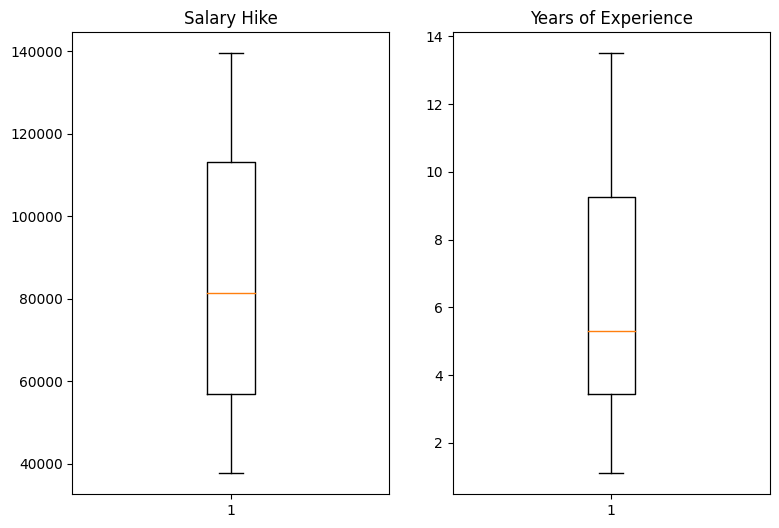

In [9]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

In [10]:
#Outlier Treatment

def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [11]:
df_cleaned = outlier_detect(df)
df_cleaned

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [12]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


Visualization of Correlation beteen x and y

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

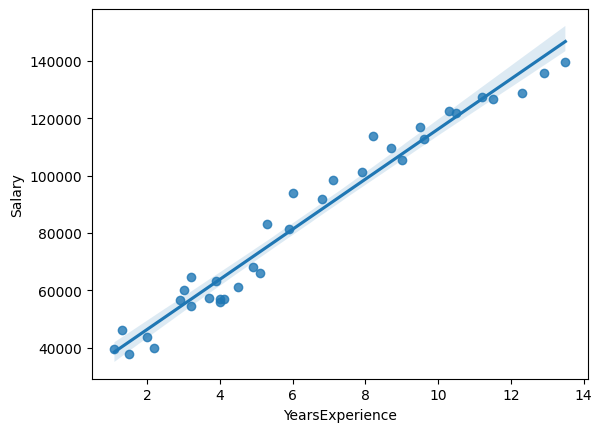

In [13]:

sns.regplot(x=df['YearsExperience'],y=df['Salary'])  

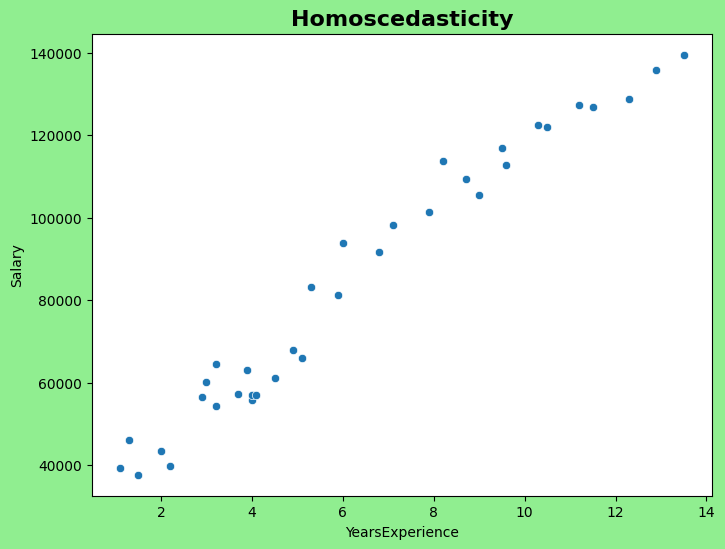

In [14]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [15]:
df.var()

YearsExperience    1.309434e+01
Salary             1.034438e+09
dtype: float64

Feature Engineering


Trying different transformation of data to estimate normal distribution and remove any skewness

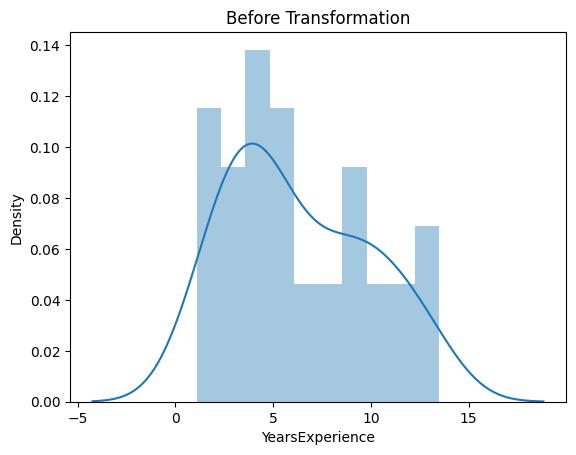

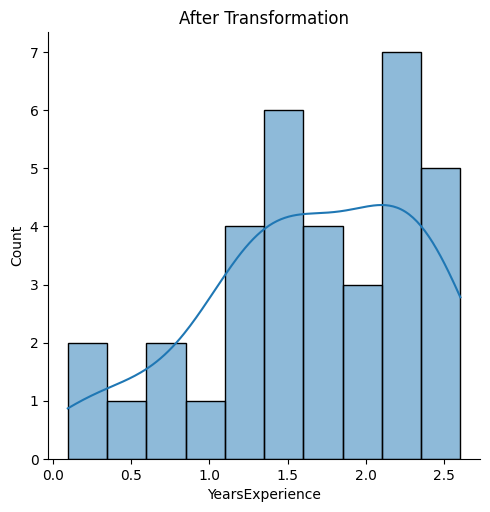

In [16]:
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

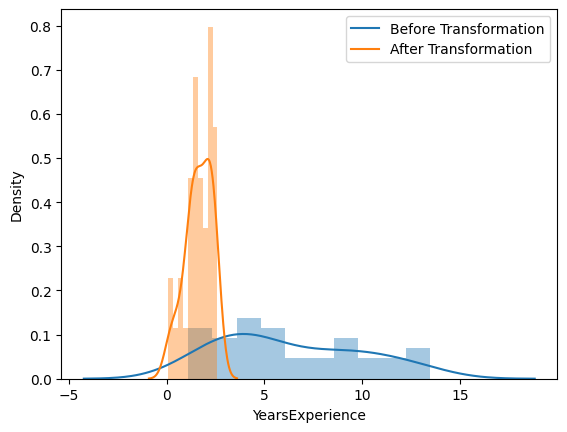

In [17]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

How log transformation affects the data and it scales the values down.
Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

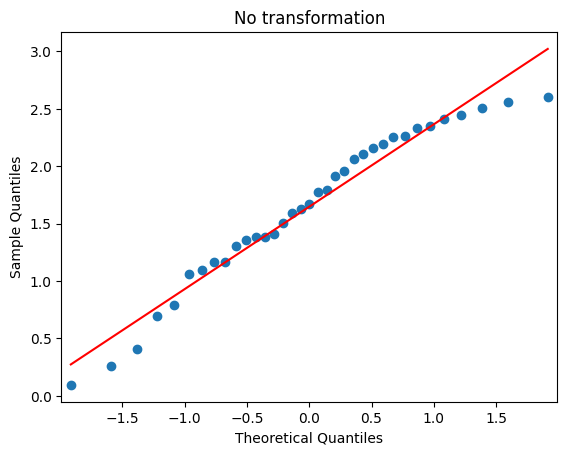

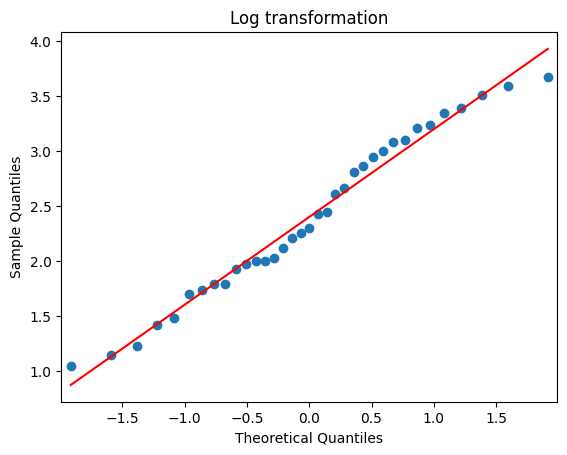

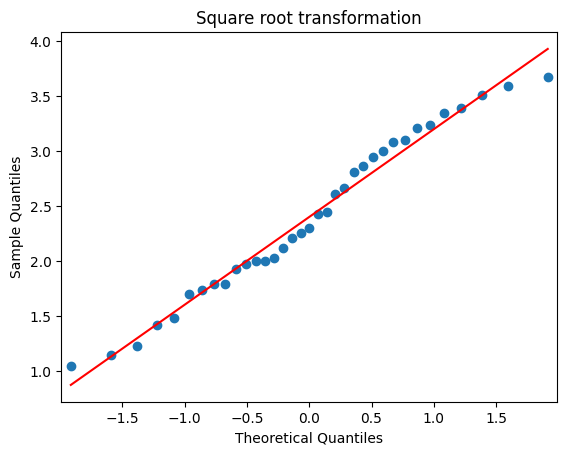

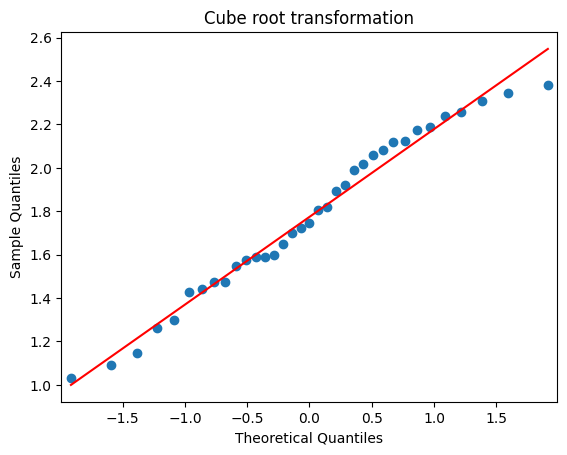

In [18]:
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression
It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [19]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = df).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     914.3
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.23e-25
Time:                        11:08:52   Log-Likelihood:                -353.66
No. Observations:                  35   AIC:                             711.3
Df Residuals:                      33   BIC:                             714.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.886e+04   2092.797     13.790      0.000    2.46e+04    3.31e+04
YearsExperience  8731.9410    288.783     30.237      0.000    8144.407    9319.475
==============================================================================
Omnibus:                        1.704   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.498
Skew:                           0.372   Prob(JB):                        0.473
Kurtosis:                       2.313   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and Adjusted R-squared scores are above 0.85.
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
F-statitics is quite high as well and yes desire it to be higher
But log-likelihood is quite very low far away from 0
and AIC and BIC score are much higher for this model
Lets Try some data transformation to check whether these scores can get any better than this.

Square Root transformation on data

In [21]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     792.9
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.18e-24
Time:                        11:08:52   Log-Likelihood:                -133.85
No. Observations:                  35   AIC:                             271.7
Df Residuals:                      33   BIC:                             274.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  106.9542      6.589     16.231      0.000      93.548     120.361
np.sqrt(YearsExperience)    73.8765      2.624     28.159      0.000      68.539      79.214
==============================================================================
Omnibus:                        0.662   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.700
Skew:                           0.089   Prob(JB):                        0.705
Kurtosis:                       2.330   Cond. No.                         9.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
F-statitics has gotten a little lower for this model than previous.
But log-likelihood got better than before close to 0 higher than previous model
and AIC and BIC score are now much better for this model
Lets Try some data transformation to check whether these scores can get any better than this.

In [22]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     678.9
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.38e-23
Time:                        11:08:52   Log-Likelihood:                -56.482
No. Observations:                  35   AIC:                             117.0
Df Residuals:                      33   BIC:                             120.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.8047      1.030     16.321      0.000      14.710      18.899
np.cbrt(YearsExperience)    14.8026      0.568     26.055      0.000      13.647      15.958
==============================================================================
Omnibus:                        0.044   Durbin-Watson:                   1.227
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.209
Skew:                           0.067   Prob(JB):                        0.901
Kurtosis:                       2.646   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     446.5
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           9.46e-21
Time:                        11:08:52   Log-Likelihood:                 29.366
No. Observations:                  35   AIC:                            -54.73
Df Residuals:                      33   BIC:                            -51.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3126      0.048    212.822      0.000      10.214      10.411
np.log(YearsExperience)     0.5759      0.027     21.132      0.000       0.520       0.631
==============================================================================
Omnibus:                        0.701   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.151
Skew:                           0.123   Prob(JB):                        0.927
Kurtosis:                       3.209   Cond. No.                         6.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Testing
As Y = Beta0 + Beta1*(X)

Finding Coefficient Parameters (Beta0 and Beta1 values)

In [24]:
model.params

Intercept          28859.526195
YearsExperience     8731.941047
dtype: float64

Here, (Intercept) Beta0 value = 28859.526195 & (YearsExperience) Beta1 value =  8731.941047
Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [25]:
print(model.tvalues,'\n',model.pvalues)

Intercept          13.789930
YearsExperience    30.237016
dtype: float64 
 Intercept          2.987124e-15
YearsExperience    1.230991e-25
dtype: float64


(Intercept) Beta0: tvalue=49.537709 , pvalue=0.000000
(daily) Beta1: tvalue=1.648015, pvalue= 1.648015
As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(YearsExperience) variable has good slope and variance w.r.t Y(Salary) variable.
R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [26]:
model.rsquared,model.rsquared_adj

(0.9651633106751443, 0.964107653422876)

Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%

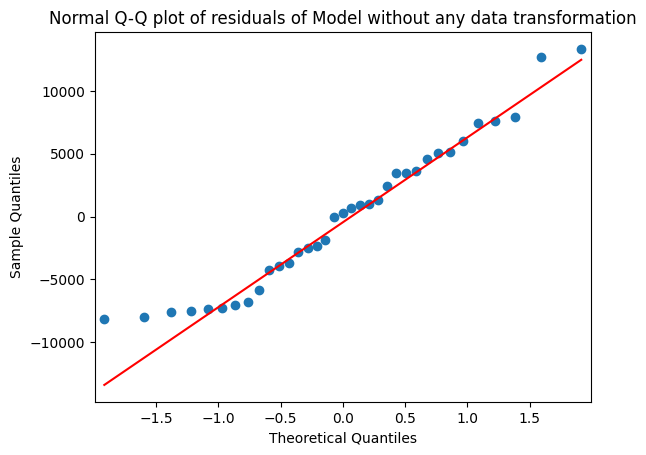

In [27]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

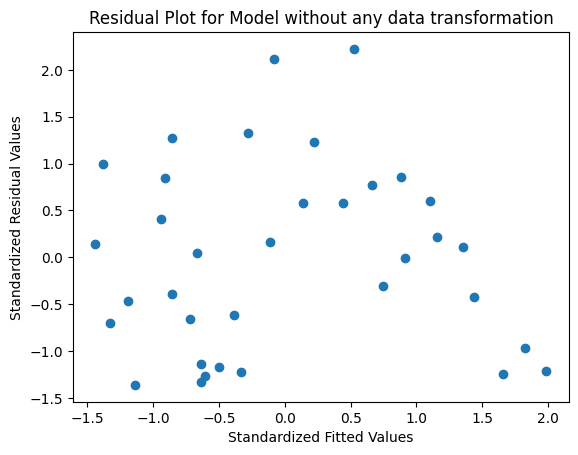

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

Model Validation


We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.


Comparing different models with respect to the Root Mean Squared Errors

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
model1_pred_y =np.square(model1.predict(df['YearsExperience']))
model2_pred_y =pow(model2.predict(df['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(df['YearsExperience']))

In [32]:
model1_rmse =np.sqrt(mean_squared_error(df['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 6093.3070256201245 
model1= 5777.357335089809 
model2= 5874.440513865273 
model3= 6621.808061589096


In [33]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model1'

Predicting values

In [34]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = df.YearsExperience
predicted2['Salary'] = df.Salary
predicted2['Predicted_wage'] = pd.DataFrame(model.predict(df['YearsExperience']))
predicted2

,YearsExperience,Salary,Predicted_wage
0,1.1,39343,38464.661346
1,1.3,46205,40211.049556
2,1.5,37731,41957.437765
3,2.0,43525,46323.408289
4,2.2,39891,48069.796498
5,2.9,56642,54182.155231
6,3.0,60150,55055.349336
7,3.2,54445,56801.737545
8,3.2,64445,56801.737545
9,3.7,57189,61167.708069


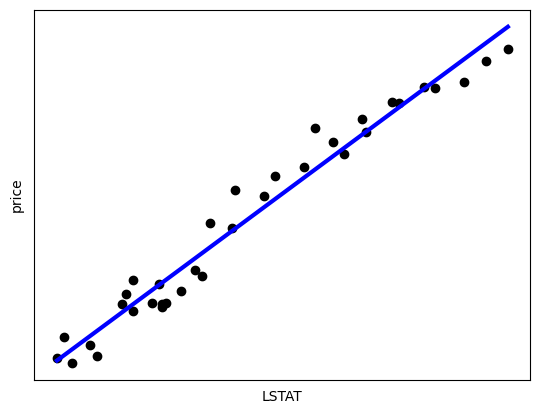

In [35]:
plt.scatter(predicted2['YearsExperience'], predicted2['Salary'],  color='black')  
plt.plot(predicted2['YearsExperience'], predicted2['Predicted_wage'], color='blue', linewidth=3)  
plt.xticks(())  
plt.yticks(())  
plt.xlabel('LSTAT')  
plt.ylabel('price')   
plt.show()